# Understanding AlphaZero

First, we seek to mimic
```zsh
python -m nsai_experiments.alphazero_torch --game CartPole-v1 --n_ep 50 --n_mcts 10
```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

import gymnasium as gym
from nsai_experiments import alphazero_torch as azt
from nsai_experiments.deps import helpers

Making game CartPole-v1


/Users/gkonars/Documents/JuliaProjects/S-NSAI/nsai_experiments/.venv/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/gkonars/Documents/JuliaProjects/S-NSAI/nsai_experiments/.venv/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]             640
               ELU-2               [-1, 1, 128]               0
            Linear-3               [-1, 1, 128]          16,512
               ELU-4               [-1, 1, 128]               0
Total params: 17,152
Trainable params: 17,152
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.07
----------------------------------------------------------------
Finished episode 0, total return: 9.0, total time: 0.1 sec
Finished episode 1, total return: 10.0, total time: 0.0 sec
Finished episode 2, total return: 9.0, total time: 0.0 sec
Finished episode 3, total return: 14.0, total time: 0.1 sec
Finished episode 4, total return: 69.0, total time: 1.1 sec
Fi

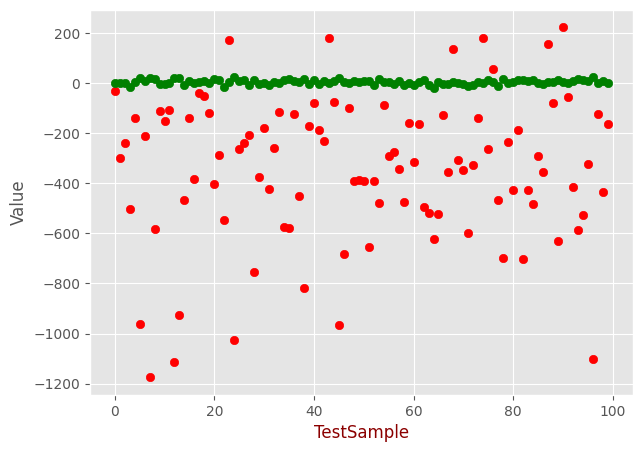

In [3]:
episode_returns,timepoints,a_best,seed_best,R_best = azt.agent(
    game="CartPole-v1", n_ep=50, n_mcts=10, max_ep_len=300, lr=0.001,
    c=1.5, gamma=1.0, data_size=1000, batch_size=32, temp=1.0, n_hidden_layers=2, n_hidden_units=128, nsites=20)

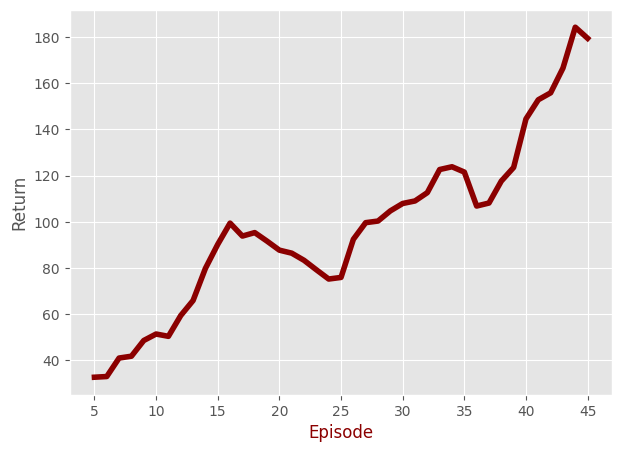

In [4]:
def plot_results(episode_returns, window=10):
    fig,ax = plt.subplots(1,figsize=[7,5])
    total_eps = len(episode_returns)
    episode_returns_smoothed = helpers.smooth(episode_returns,window,mode='valid') 
    ax.plot(helpers.symmetric_remove(np.arange(total_eps),window-1),episode_returns_smoothed,linewidth=4,color='darkred')
    ax.set_ylabel('Return')
    ax.set_xlabel('Episode',color='darkred')
    plt.plot()
plot_results(episode_returns)

Making game CartPole-v1
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]             640
               ELU-2               [-1, 1, 128]               0
            Linear-3               [-1, 1, 128]          16,512
               ELU-4               [-1, 1, 128]               0
Total params: 17,152
Trainable params: 17,152
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.07
----------------------------------------------------------------
Finished episode 0, total return: 12.0, total time: 0.0 sec
Finished episode 1, total return: 26.0, total time: 0.1 sec


/Users/gkonars/Documents/JuliaProjects/S-NSAI/nsai_experiments/.venv/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/gkonars/Documents/JuliaProjects/S-NSAI/nsai_experiments/.venv/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Finished episode 2, total return: 10.0, total time: 0.0 sec
Finished episode 3, total return: 95.0, total time: 0.7 sec
Finished episode 4, total return: 46.0, total time: 0.5 sec
Finished episode 5, total return: 200.0, total time: 13.7 sec
Finished episode 6, total return: 101.0, total time: 0.8 sec
Finished episode 7, total return: 68.0, total time: 0.8 sec
Finished episode 8, total return: 72.0, total time: 0.6 sec
Finished episode 9, total return: 150.0, total time: 2.4 sec
Finished episode 10, total return: 200.0, total time: 4.7 sec
Finished episode 11, total return: 200.0, total time: 8.2 sec
Finished episode 12, total return: 114.0, total time: 0.6 sec
Finished episode 13, total return: 200.0, total time: 2.0 sec
Finished episode 14, total return: 200.0, total time: 14.3 sec
Finished episode 15, total return: 167.0, total time: 0.9 sec
Finished episode 16, total return: 200.0, total time: 12.1 sec
Finished episode 17, total return: 96.0, total time: 0.5 sec
Finished episode 18

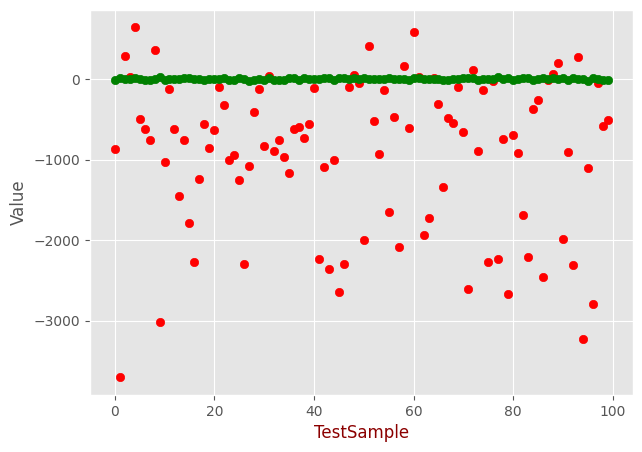

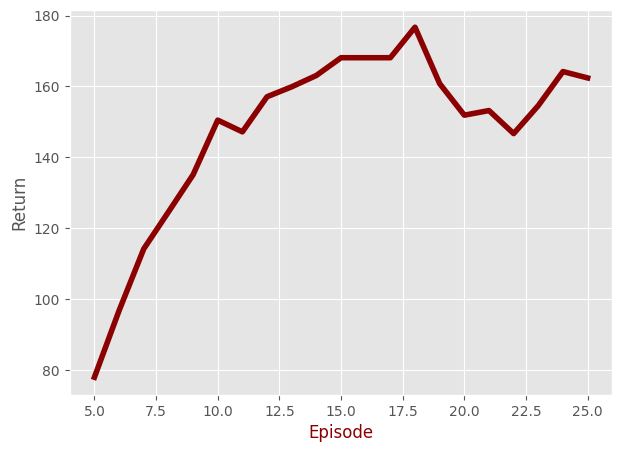

In [5]:
episode_returns,timepoints,a_best,seed_best,R_best = azt.agent(
    game="CartPole-v1", n_ep=30, n_mcts=10, max_ep_len=200, lr=0.01,
    c=1.5, gamma=1.0, data_size=1000, batch_size=32, temp=1.0, n_hidden_layers=2, n_hidden_units=128, nsites=20)
plot_results(episode_returns)

Making game CartPole-v1
Reparametrizing the reward function
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]             640
               ELU-2               [-1, 1, 128]               0
            Linear-3               [-1, 1, 128]          16,512
               ELU-4               [-1, 1, 128]               0
Total params: 17,152
Trainable params: 17,152
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.07
----------------------------------------------------------------
Finished episode 0, total return: 0.05, total time: 0.1 sec
Finished episode 1, total return: 0.08, total time: 0.3 sec
Finished episode 2, total return: 0.05, total time: 0.2 sec
Finished episode 3, total return: 0.15, total time: 0.5 sec


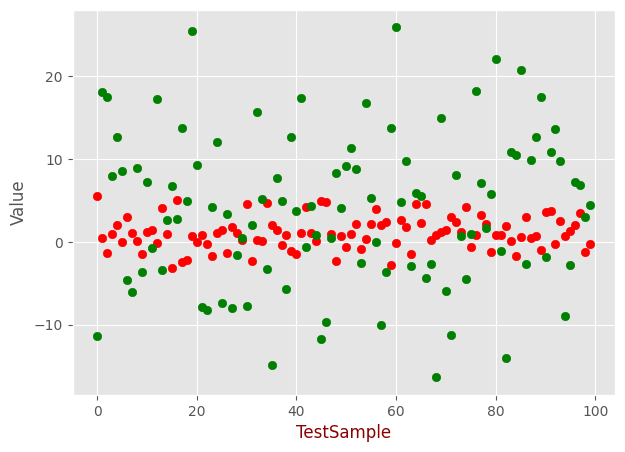

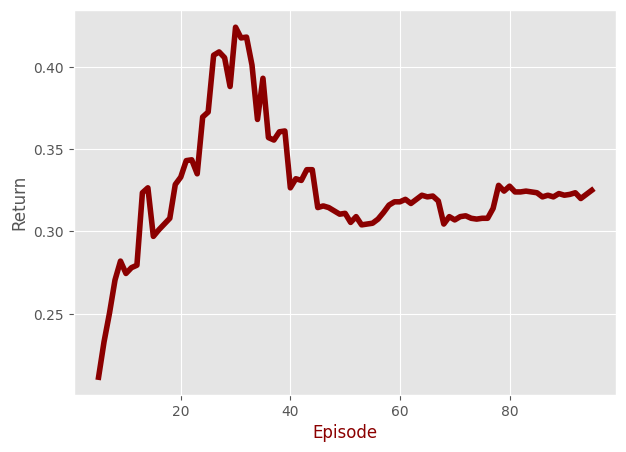

In [6]:
episode_returns,timepoints,a_best,seed_best,R_best = azt.agent(
    game="CartPole-v1r", n_ep=100, n_mcts=40, max_ep_len=200, lr=0.01,
    c=1.5, gamma=1.0, data_size=1000, batch_size=32, temp=20.0, n_hidden_layers=2, n_hidden_units=128, nsites=20)
plot_results(episode_returns)

Let's try with fewer neurons:

Making game CartPole-v1
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 32]             160
               ELU-2                [-1, 1, 32]               0
            Linear-3                [-1, 1, 32]           1,056
               ELU-4                [-1, 1, 32]               0
Total params: 1,216
Trainable params: 1,216
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------
Finished episode 0, total return: 11.0, total time: 0.1 sec
Finished episode 1, total return: 11.0, total time: 0.1 sec
Finished episode 2, total return: 11.0, total time: 0.1 sec
Finished episode 3, total return: 11.0, total time: 0.1 sec
Finished episode 4, total return: 11.0

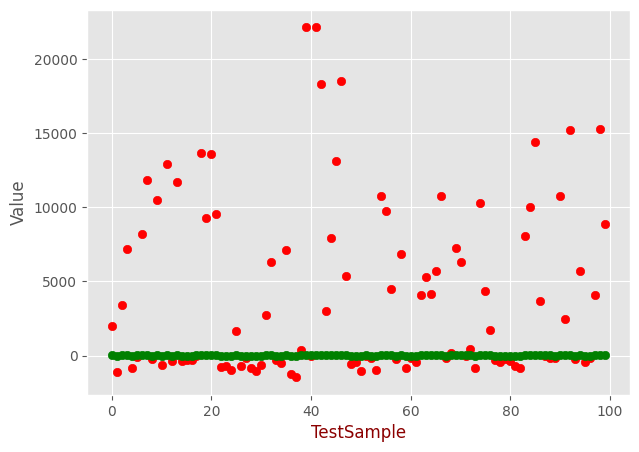

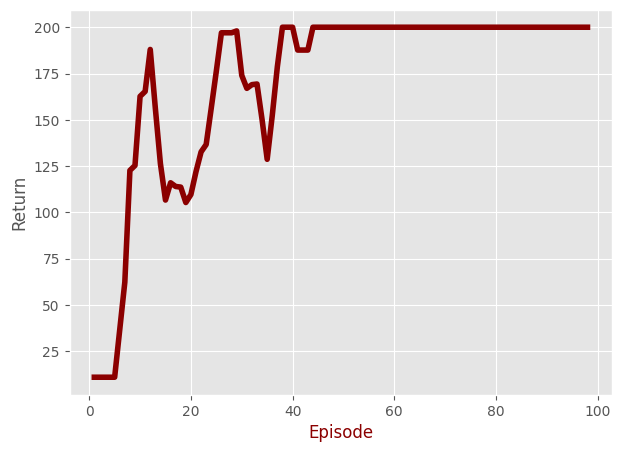

In [22]:
episode_returns,timepoints,a_best,seed_best,R_best = azt.agent(
    game="CartPole-v1", n_ep=100, n_mcts=20, max_ep_len=200, lr=0.001,
    c=1.5, gamma=1.0, data_size=1000, batch_size=32, temp=2.0, n_hidden_layers=2, n_hidden_units=32, nsites=20)
plot_results(episode_returns, window=3)